### Machine Learning Technic in Credit Score Modeling System

#### ABSTRACT

   Every lender's organization such as banks and credit card companies use credit scores for determining the creditworthiness of clients. Currently, they are using numerical scoring system in where the score is determined by the compering new customer vs. existing customer profile. This doesn’t capture the behavior of certain individual entities or more optimal ways to segment scoring models. Now it has been analyzed that the problem can be use optimized using machine learning technique. In this study, we applied various machine learning technic to identify the bad loans, minimize credit risk and maximize the profit of a Bank. Hence this study is intended to find the best modeling with best performance and accuracy.
   
#### Keywords

    Machine Learning, Python, Credit Scoring, Logistic Regression, KNN, Decision Trees, Random Forest.
    
### Introduction :

The process of deciding to accept or reject a client‟s credit by banks is commonly executed via judgmental techniques and/or credit scoring models. A good credit risk assessment method can help ﬁnancial institutions to grant loans to creditable applicants, thus increase proﬁts; it can also deny credit for the non-creditable applicants, so decrease losses. In recent years, credit scoring has been become one of the primary ways for ﬁnancial institutions to assess credit risk,improve cash ﬂow, reduce possible risks and make managerial decisions. The factors involved in determining this likelihood are complex, and extensive statistical analysis and modelling are required to predict the outcome for each individual case. In this modern computerized world, this process of deciding can be optimized using statistical methods in machine learning.

In business terms, we try to minimize the risk and maximize of profit for the bank. To minimize loss from the bank’s perspective, the bank needs a decision rule regarding who to give approval of the loan and who not to. An applicant’s demographic and socio-economic profiles are considered by loan managers before a decision is taken regarding his/her loan application.

Here we are going to design a Credit Risk Modelling System for lender's Organization. In our country due to some unknown reasons few of loans are get classified. So a good credit risk modelling system can help to forecast the credit risk. Our study is to develop a credit risk modelling system which can minimize the risk of Credit given to people and maximize bank profit .

Hence this study is intended to find the best modelling with best performance and accuracy. In this project we will sort out different challenges during data collection and filtering and suitable classification algorithm to find the best prossibilites of loan .Later with evaluation metrics we will evaluate our data and will try to find the best solutions for the Provided Data set .

### Exploratory Data Analysis And Data Preprocessing :
Pre-processing refers to the transformations applied to the data before feeding it to the algorithm. Data Preprocessing,Includes Data Collection , Cleaning ,Conversion of features , Imputing missing data ,features standardizations , feature scaling and identify new potential features.

#### Source of Data Set :

We have been used data set provided by Microsoft Corporation for analysis and research purpose.
  
Lets get started by importing important packages and the data set.
    

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings("ignore")

from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline

from sklearn.metrics import classification_report,confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings("ignore")

import time

In [4]:
loan_data_df=pd.read_csv('LoansTrainingSetV2.csv')

In [5]:
loan_data_df.head(5)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Charged Off,12232,Short Term,7280.0,< 1 year,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946,0.0,0.0
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Charged Off,25014,Long Term,7330.0,10+ years,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,NaN,14,0,35706,77961,0.0,0.0
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Charged Off,16117,Short Term,7240.0,9 years,Home Mortgage,60438.0,Home Improvements,1244.02,16.7,32.0,11,1,11275,14815,1.0,0.0
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,Charged Off,11716,Short Term,7400.0,3 years,Rent,34171.0,Debt Consolidation,990.94,10.0,NaN,21,0,7009,43533,0.0,0.0
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Charged Off,9789,Long Term,6860.0,10+ years,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25.0,13,1,16913,19553,1.0,0.0


Rename all column name

In [6]:
loan_data =loan_data_df.rename(columns = {'Loan ID':'loan_id' ,\
                                          'Customer ID' :'customer_id' ,\
                                          'Loan Status' :'loan_status',\
                                          'Current Loan Amount' : 'current_loan_amount' ,\
                                          'Term' :'term',\
                                          'Credit Score':'credit_score' ,\
                                          'Years in current job' : 'years_in_current_job',\
                                          'Home Ownership' :'home_ownership' ,\
                                          'Annual Income' :'annual_income' ,\
                                          'Purpose' :'purpose',\
                                          'Monthly Debt' :'monthly_debt',\
                                          'Years of Credit History' :'years_of_credit_history' ,\
                                          'Months since last delinquent' :'months_since_last_delinquent',
                                          'Number of Open Accounts' : 'number_of_open_accounts' ,
                                          'Number of Credit Problems': 'number_of_credit_problems',
                                          'Current Credit Balance' : 'current_credit_balance' ,
                                          'Maximum Open Credit' :'maximum_open_credit',
                                          'Bankruptcies':'bankruptcies',
                                          'Tax Liens' :'tax_liens',
                                          'flag' :'defaulter_or_not'
                                           })

In [7]:
loan_data.head(5)

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Charged Off,12232,Short Term,7280.0,< 1 year,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946,0.0,0.0
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Charged Off,25014,Long Term,7330.0,10+ years,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,NaN,14,0,35706,77961,0.0,0.0
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Charged Off,16117,Short Term,7240.0,9 years,Home Mortgage,60438.0,Home Improvements,1244.02,16.7,32.0,11,1,11275,14815,1.0,0.0
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,Charged Off,11716,Short Term,7400.0,3 years,Rent,34171.0,Debt Consolidation,990.94,10.0,NaN,21,0,7009,43533,0.0,0.0
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Charged Off,9789,Long Term,6860.0,10+ years,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25.0,13,1,16913,19553,1.0,0.0


In [8]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111107 entries, 0 to 111106
Data columns (total 19 columns):
loan_id                         111107 non-null object
customer_id                     111107 non-null object
loan_status                     111107 non-null object
current_loan_amount             111107 non-null int64
term                            111107 non-null object
credit_score                    89769 non-null float64
years_in_current_job            111107 non-null object
home_ownership                  111107 non-null object
annual_income                   89769 non-null float64
purpose                         111107 non-null object
monthly_debt                    111107 non-null object
years_of_credit_history         111107 non-null float64
months_since_last_delinquent    52104 non-null float64
number_of_open_accounts         111107 non-null int64
number_of_credit_problems       111107 non-null int64
current_credit_balance          111107 non-null int64
maximum_open

# Start Data Analysis

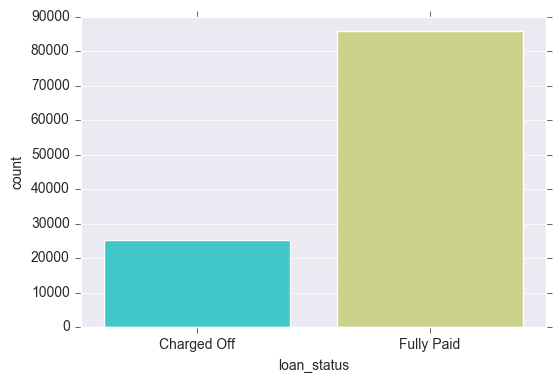

In [9]:
sns.countplot(x='loan_status',data=loan_data,palette='rainbow')

Only two value in loan status column and it is non-numerical data, we will convert into numerical data.

In [10]:
loan_data['flag'] = loan_data['loan_status'].replace(['Charged Off' ,'Fully Paid'], [1, 0]) ;

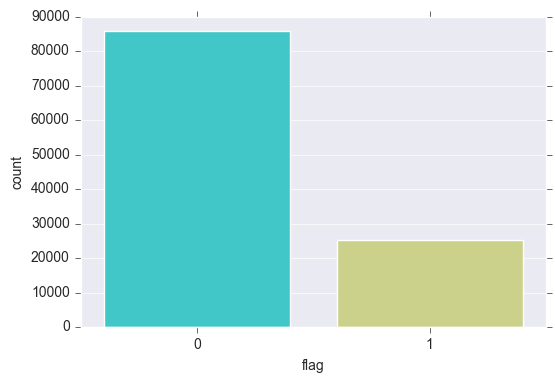

In [11]:
sns.countplot(x='flag',data=loan_data,palette='rainbow')

Analyze the dimension of data and observation list

In [12]:
print ("Dimensions of Data ")
print (loan_data.shape)
print ('\n')
print ("Data types : ")
print (loan_data.dtypes)

Dimensions of Data 
(111107, 20)


Data types : 
loan_id                          object
customer_id                      object
loan_status                      object
current_loan_amount               int64
term                             object
credit_score                    float64
years_in_current_job             object
home_ownership                   object
annual_income                   float64
purpose                          object
monthly_debt                     object
years_of_credit_history         float64
months_since_last_delinquent    float64
number_of_open_accounts           int64
number_of_credit_problems         int64
current_credit_balance            int64
maximum_open_credit              object
bankruptcies                    float64
tax_liens                       float64
flag                              int64
dtype: object


Intially From the Source Data There are 20 Features and 111107 observations. Several of the column variables are encoded as numeric data types (ints and floats) but a few of them are encoded as "object". Now check the head of the data to get a better sense of what the variables look like.

In [13]:
loan_data.head(5)

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens,flag
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Charged Off,12232,Short Term,7280.0,< 1 year,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946,0.0,0.0,1
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Charged Off,25014,Long Term,7330.0,10+ years,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,NaN,14,0,35706,77961,0.0,0.0,1
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Charged Off,16117,Short Term,7240.0,9 years,Home Mortgage,60438.0,Home Improvements,1244.02,16.7,32.0,11,1,11275,14815,1.0,0.0,1
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,Charged Off,11716,Short Term,7400.0,3 years,Rent,34171.0,Debt Consolidation,990.94,10.0,NaN,21,0,7009,43533,0.0,0.0,1
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Charged Off,9789,Long Term,6860.0,10+ years,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25.0,13,1,16913,19553,1.0,0.0,1


After getting a sense of the data's structure, it is a good idea to look at a statistical summary of the variables.

In [14]:
loan_data.describe()

,current_loan_amount,credit_score,annual_income,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,bankruptcies,tax_liens,flag
count,1.111070e+05,89769.000000,8.976900e+04,111107.000000,52104.000000,111107.000000,111107.000000,1.111070e+05,110879.00000,111096.000000,111107.000000
mean,1.147718e+07,1075.795029,7.248600e+04,18.201003,34.902272,11.125105,0.168027,1.548314e+04,0.11766,0.029353,0.226565
std,3.185508e+07,1474.133505,5.593094e+04,7.014495,21.970696,5.010267,0.484212,1.982115e+04,0.35142,0.260575,0.418611
min,4.910000e+02,585.000000,4.033000e+03,3.600000,0.000000,0.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000
25%,8.162000e+03,NaN,NaN,13.500000,NaN,8.000000,0.000000,5.905000e+03,NaN,NaN,0.000000
50%,1.418300e+04,NaN,NaN,16.900000,NaN,10.000000,0.000000,1.102700e+04,NaN,NaN,0.000000
75%,2.382200e+04,NaN,NaN,21.700000,NaN,14.000000,0.000000,1.933800e+04,NaN,NaN,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,70.500000,176.000000,76.000000,15.000000,1.730472e+06,7.00000,15.000000,1.000000


It's appear that non-numeric columns has dropped from the statistical summary provided by loan_data.describe(). There are some non numerical values for this summary may not reflect the proper. Now get a summary of the categorical variables by passing only those columns to describe().

In [15]:
categorical = loan_data.dtypes[loan_data.dtypes == "object"].index
print(categorical)

Index(['loan_id', 'customer_id', 'loan_status', 'term', 'years_in_current_job',
       'home_ownership', 'purpose', 'monthly_debt', 'maximum_open_credit'],
      dtype='object')


In [16]:
loan_data[categorical].describe()

,loan_id,customer_id,loan_status,term,years_in_current_job,home_ownership,purpose,monthly_debt,maximum_open_credit
count,111107,111107,111107,111107,111107,111107,111107,111107,111107
unique,88910,88910,2,2,12,4,16,90362,67309
top,b6d3ec81-72d5-4c68-a2ca-5f753c47cc77,f5e6a7e1-d91f-4ae1-ae11-4948e25db7a8,Fully Paid,Short Term,10+ years,Home Mortgage,Debt Consolidation,0,0
freq,2,2,85934,80274,34551,53818,87277,55,450


Although describe() gives a concise overview of each variable, it does not necessarily give us enough information to determine what each variable means. That's why it is required to know the perpose of each column data. Now let's get to know the purpose of each variable.

In [17]:
# Loan ID: A unique Identifier for the loan information.

# Customer ID: A unique identifier for the customer. Customers may have more than one loan.

# Loan Status: A categorical variable indicating if the loan was paid back or defaulted.

# Current Loan Amount: This is the loan amount that was either completely paid off, or the amount that was defaulted.

# Term: A categorical variable indicating if it is a short term or long term loan.

# Credit Score: A value between 0 and 800 indicating the riskiness of the borrowers credit history.

# Years in current job: A categorical variable indicating how many years the customer has been in their current job.

# Home Ownership: Categorical variable indicating home ownership. Values are "Rent", "Home Mortgage", and "Own". If the value is OWN, then the customer is a home owner with no mortgage

# Annual Income: The customer's annual income

# Purpose: A description of the purpose of the loan.

# Monthly Debt: The customer's monthly payment for their existing loans

# Years of Credit History: The years since the first entry in the customer’s credit history •
# Months since last delinquent: Months since the last loan delinquent payment

# Number of Open Accounts: The total number of open credit cards

#  Number of Credit Problems: The number of credit problems in the customer records.

# Current Credit Balance: The current total debt for the customer

#  Maximum Open Credit: The maximum credit limit for all credit sources.

# Bankruptcies: The number of bankruptcies

# Tax Liens: The number of tax liens.

After looking at the data for the first time, I have to consider the following things.

   1. Remove unnecessary variable.
   2. Analyze the NA values, outliers or other strange values.
   3. Perform transformation for categorical variables.
   4. Consider new variable.

For the rest of this lesson we will address each of these questions in the context of this data set.

#### Remove All variables that are not important for evaluation:

Getting rid of unnecessary variables is a good first step when dealing with any data set, since dropping variables reduces complexity and can make computation on the data faster. Loan id is random varaible which does not make any sense . As we are building the model on loan level not on customer level ,we are considering the attributes of loans but not the customer. So we are removing the customer id.


In [18]:
del loan_data["customer_id"]
del loan_data["loan_id"]

#### Analyze the NA values, outliers or other strange values: 
Data sets are often littered with missing data, extreme data points called outliers and other strange values. Missing values, outliers and strange values can negatively affect statistical tests and models and may even cause certain functions to fail.
In Python, you can detect missing values with the pd.isnull() function:

1. Detecting Missing Values :
  let us first find out how many values are missing . Missing values shows the data discripency. Let us see whether we can find some detail insight about the data .

In [19]:
loan_data.isnull().sum()

loan_status                         0
current_loan_amount                 0
term                                0
credit_score                    21338
years_in_current_job                0
home_ownership                      0
annual_income                   21338
purpose                             0
monthly_debt                        0
years_of_credit_history             0
months_since_last_delinquent    59003
number_of_open_accounts             0
number_of_credit_problems           0
current_credit_balance              0
maximum_open_credit                 0
bankruptcies                      228
tax_liens                          11
flag                                0
dtype: int64

From the above chart we can find the there are 42676 observations where credit score and annual income are not available . let us find how many of them are defaulter or not.

In [20]:
missing_cr_score =   loan_data[pd.isnull(loan_data["credit_score"])] 
missing_cr_score= pd.Categorical(missing_cr_score['loan_status'] )
m  =  pd.DataFrame(missing_cr_score.describe())
m

,counts,freqs
categories,,
Charged Off,6044,0.283251
Fully Paid,15294,0.716749


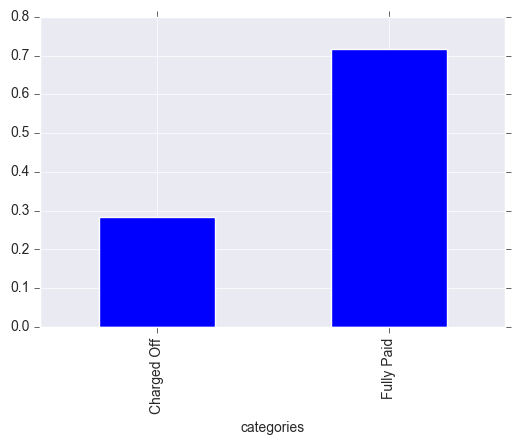

In [21]:
m.freqs.plot(kind ="bar" , color ="blue")

Approximately 29% of loan has been charged off where credit score is not available . Now we will explore the annual_income variable to find how missing values impact there .


In [22]:
missing_annual_income = loan_data[pd.isnull(loan_data["annual_income"])] 
missing_annual_income = pd.Categorical(missing_annual_income['loan_status'] )
m  =  pd.DataFrame(missing_annual_income.describe())
m

,counts,freqs
categories,,
Charged Off,6044,0.283251
Fully Paid,15294,0.716749


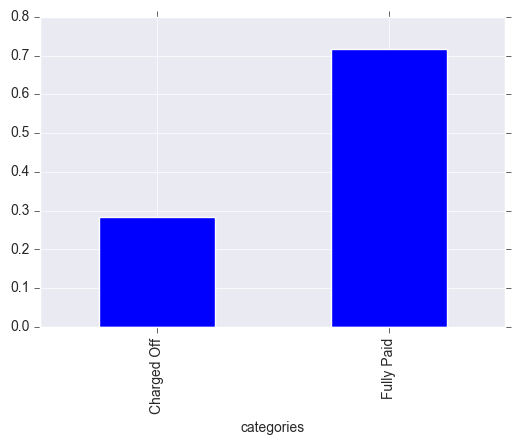

In [23]:
m.freqs.plot(kind ="bar" , color ="blue")

Similar impact like credit score .so later we will try to explore relationship between annual_income and credit_score variables .

In [24]:
missing = loan_data[pd.isnull(loan_data["months_since_last_delinquent"])] 
missing = pd.Categorical(missing['loan_status'] )
m  =  pd.DataFrame(missing.describe())
m

,counts,freqs
categories,,
Charged Off,13604,0.230565
Fully Paid,45399,0.769435


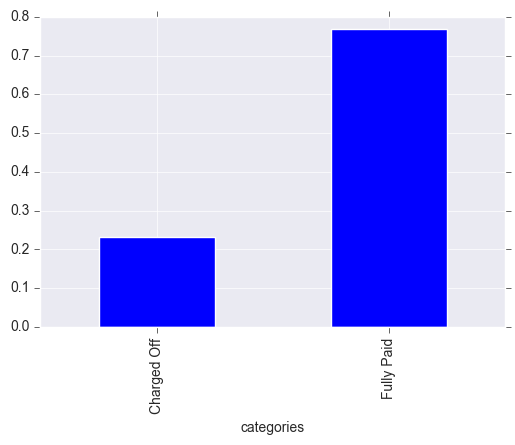

In [25]:
m.freqs.plot(kind ="bar" , color ="blue")

In [26]:
loan_data.describe()

,current_loan_amount,credit_score,annual_income,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,bankruptcies,tax_liens,flag
count,1.111070e+05,89769.000000,8.976900e+04,111107.000000,52104.000000,111107.000000,111107.000000,1.111070e+05,110879.00000,111096.000000,111107.000000
mean,1.147718e+07,1075.795029,7.248600e+04,18.201003,34.902272,11.125105,0.168027,1.548314e+04,0.11766,0.029353,0.226565
std,3.185508e+07,1474.133505,5.593094e+04,7.014495,21.970696,5.010267,0.484212,1.982115e+04,0.35142,0.260575,0.418611
min,4.910000e+02,585.000000,4.033000e+03,3.600000,0.000000,0.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000
25%,8.162000e+03,NaN,NaN,13.500000,NaN,8.000000,0.000000,5.905000e+03,NaN,NaN,0.000000
50%,1.418300e+04,NaN,NaN,16.900000,NaN,10.000000,0.000000,1.102700e+04,NaN,NaN,0.000000
75%,2.382200e+04,NaN,NaN,21.700000,NaN,14.000000,0.000000,1.933800e+04,NaN,NaN,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,70.500000,176.000000,76.000000,15.000000,1.730472e+06,7.00000,15.000000,1.000000


#### Performing the transformation for categorical variables.

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [27]:
def number_of_uniqe_values(p_column_name):
    print ("Column Name : {}".format(p_column_name))
    v_unique =loan_data[p_column_name].nunique()
    print ("Number of Unique Values : {}".format(v_unique))
    print ('\n')

In [28]:
for ind in loan_data.columns:
    number_of_uniqe_values(ind)

Column Name : loan_status
Number of Unique Values : 2


Column Name : current_loan_amount
Number of Unique Values : 22541


Column Name : term
Number of Unique Values : 2


Column Name : credit_score
Number of Unique Values : 326


Column Name : years_in_current_job
Number of Unique Values : 12


Column Name : home_ownership
Number of Unique Values : 4


Column Name : annual_income
Number of Unique Values : 37983


Column Name : purpose
Number of Unique Values : 16


Column Name : monthly_debt
Number of Unique Values : 90362


Column Name : years_of_credit_history
Number of Unique Values : 508


Column Name : months_since_last_delinquent
Number of Unique Values : 116


Column Name : number_of_open_accounts
Number of Unique Values : 52


Column Name : number_of_credit_problems
Number of Unique Values : 14


Column Name : current_credit_balance
Number of Unique Values : 33716


Column Name : maximum_open_credit
Number of Unique Values : 67309


Column Name : bankruptcies
Number of Unique

#### Categorical Variables in the Data Set :
There are four categorical Variables in the data set . Term of loans  , Purpose of loans , Home ownership and years in the current job . Among them though here years in current job is categorical variables but we will convert it to continuous as this will have significant impact on credit risk modeling .

There are two types of loan . short term and long term . 

In [29]:
pd.options.display.float_format = '{:,.3f}'.format
def calculate_amount(r ) :
    return  r *1.0/ len(loan_data) 
ct = pd.crosstab(index=loan_data["term"], 
                 columns=loan_data["loan_status"] ).apply(lambda x : calculate_amount(x ) , axis = 1)
ct

loan_status,Charged Off,Fully Paid
term,,
Long Term,0.083,0.194
Short Term,0.143,0.579


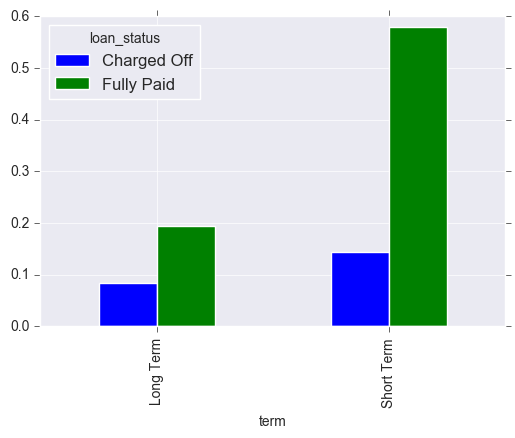

In [30]:
ct.plot(kind="bar",stacked=False)

Term loan has more vulnerable approximately term loan given to 25% people among them 48% are defaulter which is 12 % of given data set . It seems Short term loan are more safe as it has 20% defaulter which is 26% of the given short term loan . It is provided that 32% among provided data set are defaulter

In [31]:
ct = pd.crosstab(index=loan_data["purpose"], 
                          columns=loan_data["loan_status"] ).apply(lambda x : calculate_amount(x ) , axis = 1)
ct

loan_status,Charged Off,Fully Paid
purpose,,
Business Loan,0.005,0.011
Buy House,0.001,0.005
Buy a Car,0.002,0.011
Debt Consolidation,0.179,0.606
Educational Expenses,0.000,0.001
Home Improvements,0.012,0.047
Medical Bills,0.003,0.009
Other,0.006,0.026
Take a Trip,0.001,0.004


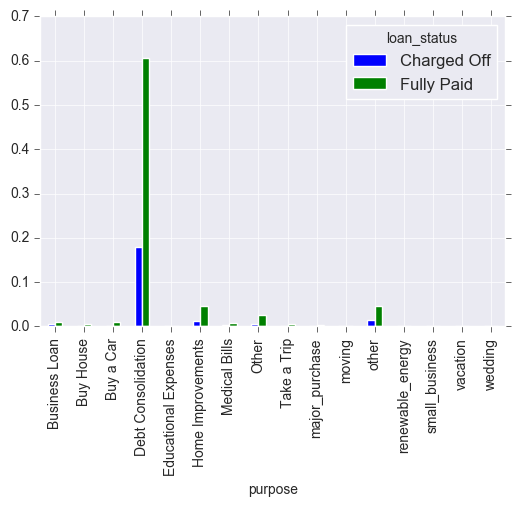

In [32]:
ct.plot(kind="bar",stacked=False)

Apporximately 80% loans are used for debt consolidation and 25% are defaulter. Other loans are very nominal as home improvments amd misc. loans are in second and 3rd positions respectively.


In [33]:
ct = pd.crosstab(index=loan_data["home_ownership"],columns=loan_data["loan_status"] ).apply(lambda x : calculate_amount(x ) , axis = 1)
ct

loan_status,Charged Off,Fully Paid
home_ownership,,
HaveMortgage,0.000,0.002
Home Mortgage,0.099,0.385
Own Home,0.021,0.071
Rent,0.106,0.316


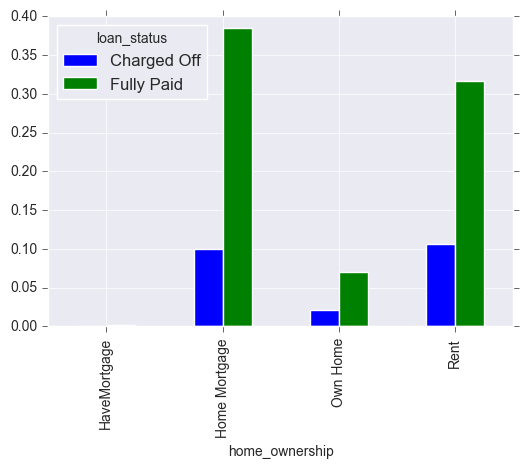

In [34]:
ct.plot(kind="bar",stacked=False)

Though most loans have been provided to them who has house mortgage, most defaulters are those who live in house with Rent. 15% are defaulter which  is more than 34 % of that loan which has been provided to people with rent house.

We could leave 'years_in_current_job' as categorical data, but it shouldn't be treated as such or as ordinal data since the intervals are easy to determine. We can convert it into numerical data with a simple filter

In [35]:
ct = pd.crosstab(index=loan_data["years_in_current_job"], 
                          columns=loan_data["loan_status"]  ).apply(lambda x : calculate_amount(x *100) , axis = 1)
ct

loan_status,Charged Off,Fully Paid
years_in_current_job,,
1 year,1.500,4.957
10+ years,6.700,24.397
2 years,1.998,7.144
3 years,1.769,6.451
4 years,1.393,4.752
5 years,1.535,5.268
6 years,1.319,4.361
7 years,1.292,4.276
8 years,1.060,3.534


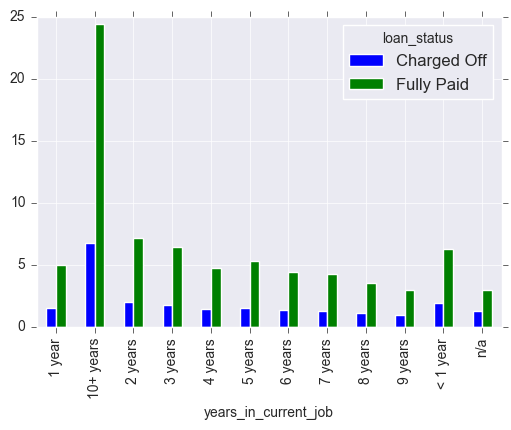

In [36]:
ct.plot(kind="bar",stacked=False)

From the Above graph it is found that most of the loans given to the employee who have more than 10+ years experience . Since It is a numerica variables we will convert it to numeric values .

#### Encoding categorical features :
We have 4 Categorical features .Purpose , Term , home_ownership ,years_in_current_job . We will convert them into distinct features using one hot encoding method and later we will drop the parent column.Before drop this let us understand what is the impact of this features into the data .

In [37]:
def one_hot_encoding(df, colname ) :
    df[colname] =  df[colname].str.lower()
    df[colname] =  df[colname].str.replace(" " ,"_")
    df = pd.concat([df, pd.get_dummies(df[colname]).rename(columns=lambda x: str(x))], axis=1) 
    df.drop(colname,axis =1 , inplace=True)
    return df

loan_data = one_hot_encoding(loan_data, 'term' ) ;
loan_data = one_hot_encoding(loan_data, 'home_ownership' ) ;
loan_data = one_hot_encoding(loan_data, 'purpose' ) ;
loan_data = one_hot_encoding(loan_data, 'years_in_current_job' ) ;

del loan_data["loan_status"]

print (loan_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111107 entries, 0 to 111106
Data columns (total 46 columns):
current_loan_amount             111107 non-null int64
credit_score                    89769 non-null float64
annual_income                   89769 non-null float64
monthly_debt                    111107 non-null object
years_of_credit_history         111107 non-null float64
months_since_last_delinquent    52104 non-null float64
number_of_open_accounts         111107 non-null int64
number_of_credit_problems       111107 non-null int64
current_credit_balance          111107 non-null int64
maximum_open_credit             111107 non-null object
bankruptcies                    110879 non-null float64
tax_liens                       111096 non-null float64
flag                            111107 non-null int64
long_term                       111107 non-null float64
short_term                      111107 non-null float64
havemortgage                    111107 non-null float64
home_mor

In [38]:
#s_purpose[s_purpose==('other')]
# print (fn_conver_string(s_purpose,'other'))
# s_purpose=pd.Series(data=loan_data['purpose'].unique())
#s_purpose=pd.Series(data=loan_data['purpose'].unique())
#def fn_conver_string(p_value):
#    return s_purpose[s_purpose==p_value].index[0]

In [39]:
loan_data.head(5)

,current_loan_amount,credit_score,annual_income,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,...,2_years,3_years,4_years,5_years,6_years,7_years,8_years,9_years,<_1_year,n/a
0,12232,"7,280.000","46,643.000",777.39,18.000,10.000,12,0,6762,7946,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
1,25014,"7,330.000","81,099.000",892.09,26.700,nan,14,0,35706,77961,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,16117,"7,240.000","60,438.000",1244.02,16.700,32.000,11,1,11275,14815,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000
3,11716,"7,400.000","34,171.000",990.94,10.000,nan,21,0,7009,43533,...,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,9789,"6,860.000","47,003.000",503.71,16.700,25.000,13,1,16913,19553,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


#### Exploring Continuous Data :
Discrete data are, again, data with a finite or countably infinite number of possible outcomes. Continuous data, on the other hand, are data which come from an interval of possible outcomes. In our Dataset examples of continuous variables to include :
   - Current loan amount           
   - Credit score                  
   - Years in current job          
   - Annual income                 
   - Monthly debt                  
   - Years of credit history       
   - Months since last delinquent  
   - Number of open accounts       
   - Number of credit problems     
   - Current credit balance        
   - Maximum open credit      
   
In each of these examples, the resulting measurement comes from an interval of possible outcomes. and the measurement tool is often the restricting factor with continuous data. We'll summarize the data graphically using histograms, Kernel Density estimator, plots, and box plots. Here, we'll investigate how to summarize continuous data numerically using order statistics and various functions of order statistics.

#### Imputing missing values :
Data sets are often littered with missing data, extreme data points called outliers and other strange values. Missing values, outliers, and strange values can negatively affect statistical tests and models and may even cause certain functions to fail.

Detecting missing values is the easy part: it is far more difficult to decide how to handle them. In cases where we have a lot of data and only a few missing values, it might make sense to simply delete records with missing values present. On the other hand, if we have more than a handful of missing values, removing records with missing values could cause to get rid of a lot of data. Missing values in categorical data are not particularly troubling because we can simply treat NA as an additional category. Missing values in numeric variables are more troublesome since we can't just treat a missing value as a number. 

Here are a few ways we could deal with them:

1. Replace the null values with 0s
2. Replace the null values with some central value like the mean or median
3. Impute values (estimate values using statistical/predictive modeling methods).

We can use seaborn to create a simple heatmap to see where we are missing data!


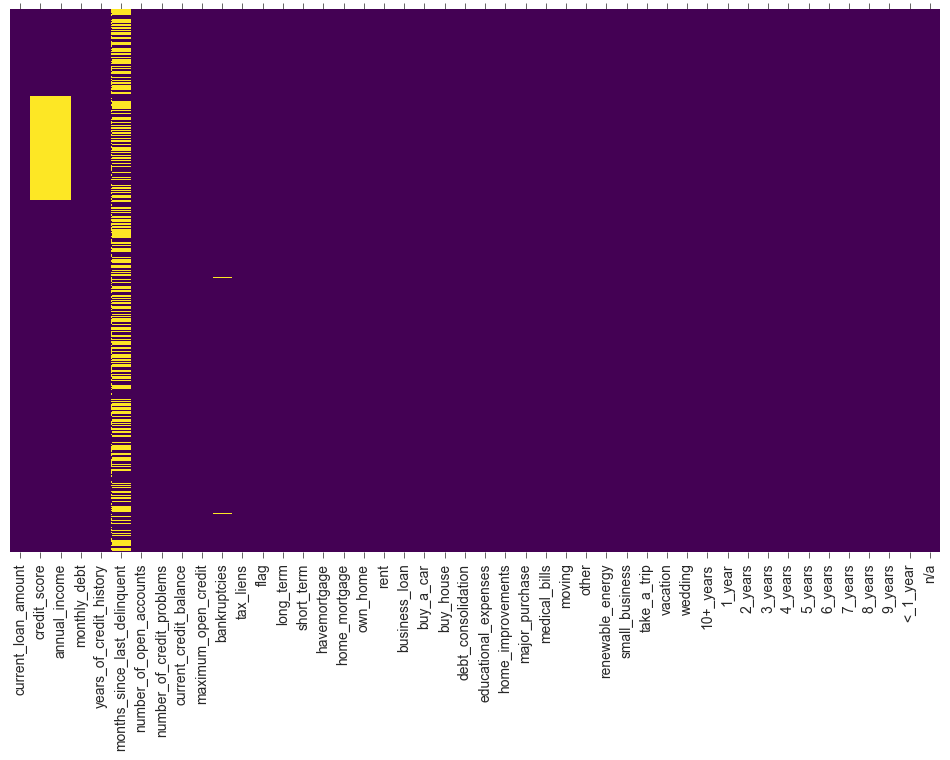

In [40]:
plt.figure(figsize=(12, 7))
sns.heatmap(loan_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [41]:
loan_data =loan_data.rename(columns = {'flag' :'defaulter_or_not'})
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111107 entries, 0 to 111106
Data columns (total 46 columns):
current_loan_amount             111107 non-null int64
credit_score                    89769 non-null float64
annual_income                   89769 non-null float64
monthly_debt                    111107 non-null object
years_of_credit_history         111107 non-null float64
months_since_last_delinquent    52104 non-null float64
number_of_open_accounts         111107 non-null int64
number_of_credit_problems       111107 non-null int64
current_credit_balance          111107 non-null int64
maximum_open_credit             111107 non-null object
bankruptcies                    110879 non-null float64
tax_liens                       111096 non-null float64
defaulter_or_not                111107 non-null int64
long_term                       111107 non-null float64
short_term                      111107 non-null float64
havemortgage                    111107 non-null float64
home_mor

It's seem that there are two object type variable exist, it is requird to conver this into int/float type.

In [42]:
loan_data['monthly_debt'] =  loan_data['monthly_debt'].str.replace("$" ," ").astype(float)
loan_data["maximum_open_credit"] = loan_data.maximum_open_credit.convert_objects(convert_numeric=True)

In [43]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111107 entries, 0 to 111106
Data columns (total 46 columns):
current_loan_amount             111107 non-null int64
credit_score                    89769 non-null float64
annual_income                   89769 non-null float64
monthly_debt                    65536 non-null float64
years_of_credit_history         111107 non-null float64
months_since_last_delinquent    52104 non-null float64
number_of_open_accounts         111107 non-null int64
number_of_credit_problems       111107 non-null int64
current_credit_balance          111107 non-null int64
maximum_open_credit             111105 non-null float64
bankruptcies                    110879 non-null float64
tax_liens                       111096 non-null float64
defaulter_or_not                111107 non-null int64
long_term                       111107 non-null float64
short_term                      111107 non-null float64
havemortgage                    111107 non-null float64
home_mo

In [44]:
features = list(loan_data.columns)
features.remove('defaulter_or_not');

target =  'defaulter_or_not'
target =  'defaulter_or_not'


X1 =  loan_data.fillna(0)[list(features)].values
y1 = loan_data[target].values


rng = np.random.RandomState(0)

n_samples = len(X1)
n_features = len(features)


# Estimate the score on the entire dataset, with no missing values

estimator = DecisionTreeClassifier(random_state=0 , max_depth=6 ,max_leaf_nodes = 20 ,criterion =  "entropy" )   
score = cross_val_score(estimator, X1, y1).mean()
print("Score with the entire dataset = %.2f" % score)


# Add missing values in 75% of the lines
missing_rate = 0.75
n_missing_samples = np.floor(n_samples * missing_rate)
missing_samples = np.hstack((np.zeros(n_samples - n_missing_samples,
                                      dtype=np.bool),
                             np.ones(n_missing_samples,
                                     dtype=np.bool)))
rng.shuffle(missing_samples)
missing_features = rng.randint(0, n_features, n_missing_samples)

# Estimate the score without the lines containing missing values
X_filtered = X1[~missing_samples, :]
y_filtered = y1[~missing_samples]
estimator = DecisionTreeClassifier(random_state=0 , max_depth=6 ,max_leaf_nodes = 20 ,criterion =  "entropy" )   
score = cross_val_score(estimator, X_filtered, y_filtered).mean()
print("Score without the samples containing missing values = %.2f" % score)

# Estimate the score after imputation of the missing values
X_missing = X1.copy()
X_missing[np.where(missing_samples)[0], missing_features] = 0
y_missing = y1.copy()
estimator = Pipeline([("imputer", Imputer(missing_values=0,
                                          strategy="mean",
                                          axis=0)),
                      ("forest", DecisionTreeClassifier(random_state=0 , \
                                                        max_depth=6 ,max_leaf_nodes = 20 ,criterion =  "entropy" )   )])
score = cross_val_score(estimator, X_missing, y_missing).mean()
print("Score after imputation of the missing values = %.2f" % score)

Score with the entire dataset = 0.56
Score without the samples containing missing values = 0.60
Score after imputation of the missing values = 0.58


From the above , we can say that if we repalce all of our data with mean then that will have minimum impact on accuracy level . So learning algorithm, we will replace our missing values with mean values.

In [45]:

loan_data['annual_income'].fillna((loan_data['annual_income'].mean()), inplace=True)
loan_data['months_since_last_delinquent'].fillna((loan_data['months_since_last_delinquent'].mean()), inplace=True)
loan_data['credit_score'].fillna((loan_data['credit_score'].mean()), inplace=True)
loan_data['bankruptcies'].fillna((loan_data['bankruptcies'].mean()), inplace=True)
loan_data['tax_liens'].fillna((loan_data['tax_liens'].mean()), inplace=True)
loan_data['maximum_open_credit'].fillna((loan_data['tax_liens'].mean()), inplace=True)
loan_data['monthly_debt'].fillna((loan_data['monthly_debt'].mean()), inplace=True)


loan_data.isnull().sum()

current_loan_amount             0
credit_score                    0
annual_income                   0
monthly_debt                    0
years_of_credit_history         0
months_since_last_delinquent    0
number_of_open_accounts         0
number_of_credit_problems       0
current_credit_balance          0
maximum_open_credit             0
bankruptcies                    0
tax_liens                       0
defaulter_or_not                0
long_term                       0
short_term                      0
havemortgage                    0
home_mortgage                   0
own_home                        0
rent                            0
business_loan                   0
buy_a_car                       0
buy_house                       0
debt_consolidation              0
educational_expenses            0
home_improvements               0
major_purchase                  0
medical_bills                   0
moving                          0
other                           0
renewable_ener

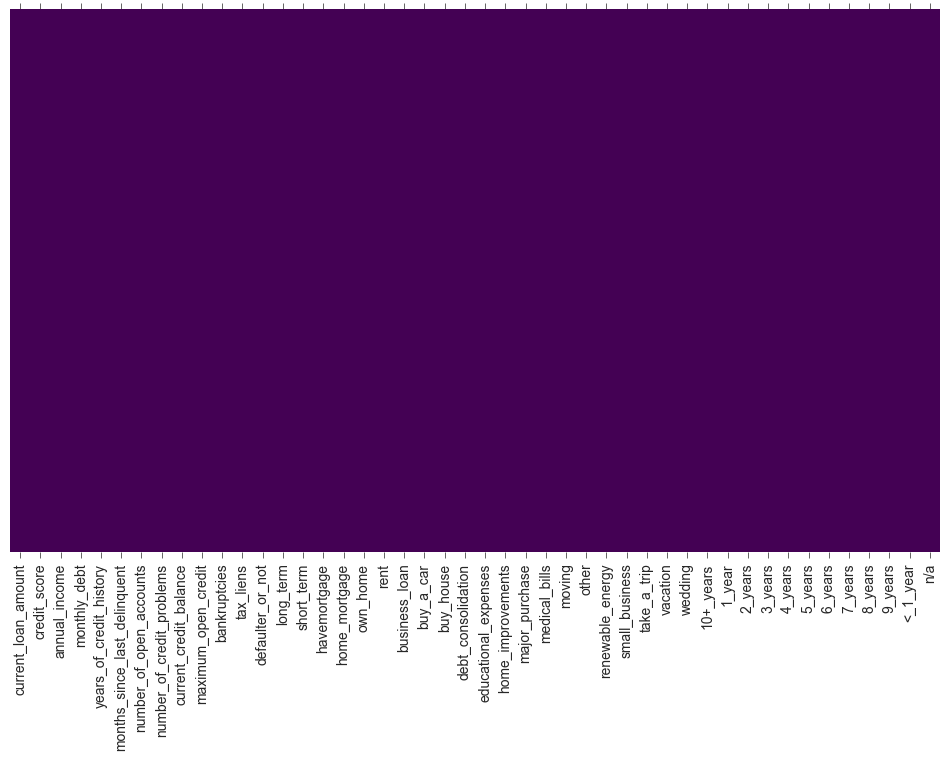

In [46]:
plt.figure(figsize=(12, 7))
sns.heatmap(loan_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### Correlation Coefficient :

Before building a model and evaluating it’s results, we need to examine the correlations between the variables in the data set. The goal is to identify those variables which have a strong linear relationship and is done by developing a correlation matrix which takes each continuous variable and finds the correlation coefficient for every pairing in the data set. The correlation coefficient is calculated using Pearson or Spearman measurements, with the values ranging from -1 (negative correlation) to 1 (positive correlation). 

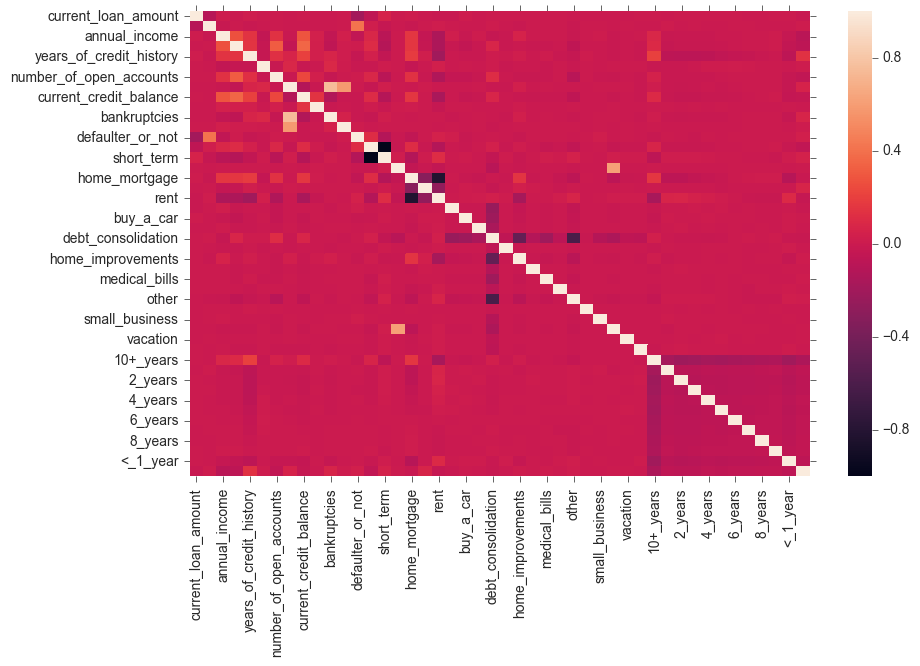

In [47]:
plt.figure(figsize=(10, 6))
sns.heatmap(loan_data.corr())

## Apply Machine Learning Model to Data Set :
To predict the class of the loan we will use a supervised model for classification. Our goal is to predict class level which is a choice of the predefined list of possibilities and make accurate predictions for new, never-before-seen data. 

In [48]:
from sklearn.cross_validation import train_test_split


### Building a Logistic Regression Model :

Logistic regression is inherited from the field of statistics. It is used in the binary classification problem in where the problem is divided into two classes. Logistic regression used an equation are very much like the linear regression in where input values (x) are combined linearly using weights or coefficient values to predict an output value (y).

   \begin{equation*}
    y = \frac { e ^ {B0+B1\times x}} {1+e ^ {B0+B1\times x}}
   \end{equation*}

Finaly after getting the result (y) it divideds the result into two class, 0 or 1. If y>0.5 then 1 otherwise 0.

##### The things need to consider at the time of data preperation : 

* Remove Noise: Logistic regression assumes no error in the output variable (y), consider removing outliers and possibly misclassified instances from your training data.

* Remove Correlated Inputs: Like linear regression, the model can overfit if you have multiple highly-correlated inputs. Consider calculating the pairwise correlations between all inputs and removing highly correlated inputs.

* Fail to Converge: It is possible for the expected likelihood estimation process that learns the coefficients to fail to converge. This can happen if there are many highly correlated inputs in your data or the data is very sparse (e.g. lots of zeros in your input data).

Now we will start machine learning part by the splitting our data into a training set and test set. In here we are using 40% data from our testing set and 60% for training set.


In [49]:
loan_data.columns

Index(['current_loan_amount', 'credit_score', 'annual_income', 'monthly_debt',
       'years_of_credit_history', 'months_since_last_delinquent',
       'number_of_open_accounts', 'number_of_credit_problems',
       'current_credit_balance', 'maximum_open_credit', 'bankruptcies',
       'tax_liens', 'defaulter_or_not', 'long_term', 'short_term',
       'havemortgage', 'home_mortgage', 'own_home', 'rent', 'business_loan',
       'buy_a_car', 'buy_house', 'debt_consolidation', 'educational_expenses',
       'home_improvements', 'major_purchase', 'medical_bills', 'moving',
       'other', 'renewable_energy', 'small_business', 'take_a_trip',
       'vacation', 'wedding', '10+_years', '1_year', '2_years', '3_years',
       '4_years', '5_years', '6_years', '7_years', '8_years', '9_years',
       '<_1_year', 'n/a'],
      dtype='object')

In [50]:
X = loan_data[['current_loan_amount', 'credit_score', 'annual_income', 'monthly_debt',
       'years_of_credit_history', 'months_since_last_delinquent',
       'number_of_open_accounts', 'number_of_credit_problems',
       'current_credit_balance', 'maximum_open_credit', 'bankruptcies',
       'tax_liens', 'long_term', 'short_term',
       'havemortgage', 'home_mortgage', 'own_home', 'rent', 'business_loan',
       'buy_a_car', 'buy_house', 'debt_consolidation', 'educational_expenses',
       'home_improvements', 'major_purchase', 'medical_bills', 'moving',
       'other', 'renewable_energy', 'small_business', 'take_a_trip',
       'vacation', 'wedding', '10+_years', '1_year', '2_years', '3_years',
       '4_years', '5_years', '6_years', '7_years', '8_years', '9_years',
       '<_1_year', 'n/a']]
y = loan_data['defaulter_or_not']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
logmodel = LogisticRegression()
t0 = time.clock()
logmodel.fit(X_train,y_train)
log_train_time = time.clock() - t0

In [54]:
t0 = time.clock()
log_predictions = logmodel.predict(X_test)
log_predictions_time = time.clock() - t0

#### Logistic Regression Model Evaluation: 

For the purpose of model evaluation we will use Clissification Report and Confusion Matrix.

#### Clissification Report: 
The classification report shows a representation of the main classification metrics on a per-class basis. This gives a deeper intuition of the classifier behavior over global accuracy which can mask functional weaknesses in one class of a multiclass problem.

#### Confusion Matrix: 
A confusion matrix is an N X N matrix, where N is the number of classes being predicted. It tells us about the distribution of our predicted values across all the actual outcomes.


In [55]:
print(confusion_matrix(y_test,log_predictions))

[[34268    82]
 [ 8138  1955]]


In [56]:
print(classification_report(y_test,log_predictions))

             precision    recall  f1-score   support

          0       0.81      1.00      0.89     34350
          1       0.96      0.19      0.32     10093

avg / total       0.84      0.82      0.76     44443



In [57]:
regr_accuracy=accuracy_score(y_test, log_predictions)
regr_precision=precision_score(y_test, log_predictions,average='weighted')
regr_recall=recall_score(y_test, log_predictions,average='weighted')
regr_f1=f1_score(y_test,log_predictions,average='weighted')
print("accuracy:", regr_accuracy)
print("Precision:", regr_precision)
print("Recall:", regr_recall)
print('f1_score:',regr_f1)

accuracy: 0.81504398893
Precision: 0.959744722631
Recall: 0.193698602992
f1_score: 0.322341302556


### k-Nearest Neighbours :
The k-NN algorithm is arguably the simplest machine learning algorithm. Building the model consists only of storing the training dataset. To make a prediction for a new data point, the algorithm finds the closest data points in the training dataset—its “nearest neighbors.”

#### Choosing the factor K:
We can see that the boundary becomes smoother with increasing value of K. With K increasing to infinity it finally becomes all blue or all red depending on the total majority.  The training error rate and the validation error rate are two parameters we need to access on different K-value. 

Now we are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1.

In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
knn = KNeighborsClassifier(n_neighbors=1)

In [60]:
t0 = time.clock()
knn.fit(X_train,y_train)
knn_train_time = time.clock() - t0

In [61]:
t0 = time.clock()
knn_predictions = knn.predict(X_test)
knn_predictions_time = time.clock() - t0

In [62]:
print(confusion_matrix(y_test,knn_predictions))

[[29132  5218]
 [ 6262  3831]]


In [63]:
print(classification_report(y_test,knn_predictions))

             precision    recall  f1-score   support

          0       0.82      0.85      0.84     34350
          1       0.42      0.38      0.40     10093

avg / total       0.73      0.74      0.74     44443



In [64]:
knn_accuracy=accuracy_score(y_test, knn_predictions)
knn_precision=precision_score(y_test, knn_predictions,average='weighted')
knn_recall=recall_score(y_test, knn_predictions,average='weighted')
knn_f1=f1_score(y_test,knn_predictions,average='weighted')
print("accuracy:", knn_accuracy)
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print('f1_score:',knn_f1)

accuracy: 0.741691604977
Precision: 0.423361697425
Recall: 0.379569999009
f1_score: 0.400271653955


#### Choosing a K Value

Now we will use the elbow method to pick a good K Value:

In [65]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

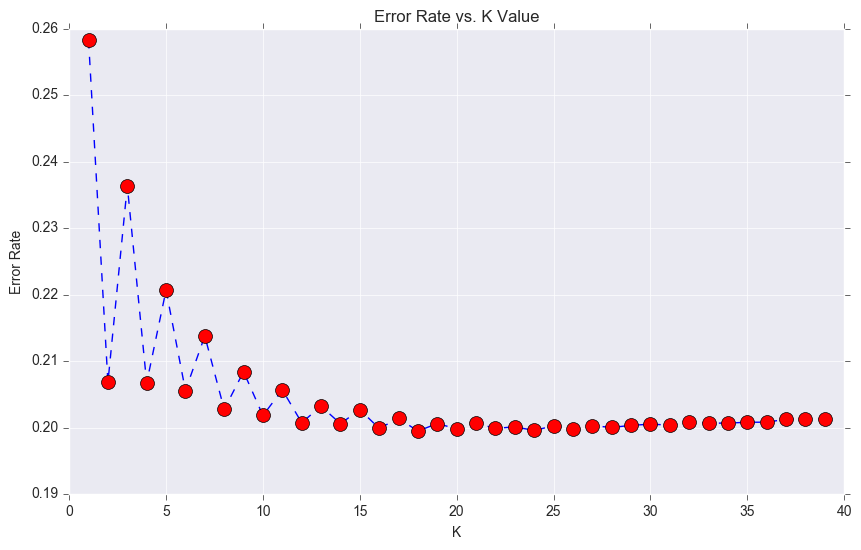

In [66]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

From the above diagram we can see that that after arouns K>20 the error rate just tends to hover around .20-.23. To finilize the K value for oure model we will retrain the model with that and check the classification report and we will use K=20.

In [67]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
knnpredictions = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,knnpredictions))
print('\n')
print(classification_report(y_test,knnpredictions))

WITH K=1


[[29132  5218]
 [ 6262  3831]]


             precision    recall  f1-score   support

          0       0.82      0.85      0.84     34350
          1       0.42      0.38      0.40     10093

avg / total       0.73      0.74      0.74     44443



In [68]:
# NOW WITH K=20
knn = KNeighborsClassifier(n_neighbors=20)

knn.fit(X_train,y_train)
knn_predictions = knn.predict(X_test)

print('WITH K=20')
print('\n')
print(confusion_matrix(y_test,knn_predictions))
print('\n')
print(classification_report(y_test,knn_predictions))

WITH K=20


[[34112   238]
 [ 8642  1451]]


             precision    recall  f1-score   support

          0       0.80      0.99      0.88     34350
          1       0.86      0.14      0.25     10093

avg / total       0.81      0.80      0.74     44443



In [69]:
knn_accuracy=accuracy_score(y_test, knn_predictions)
knn_precision=precision_score(y_test, knn_predictions,average='weighted')
knn_recall=recall_score(y_test, knn_predictions,average='weighted')
knn_f1=f1_score(y_test,knn_predictions,average='weighted')
print("accuracy:", knn_accuracy)
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print('f1_score:',knn_f1)

accuracy: 0.800193506289
Precision: 0.85908821788
Recall: 0.143763004062
f1_score: 0.246307927347


###### Strengths, weaknesses, and parameters of kNN :
In principle, there are two important parameters to the KNeighbors classifier: 
1. The number of neighbors 
2. How we measure distance between data points. In practice, using a small number of neighbors like three or five often works well, but you should certainly adjust this parameter. 

There are several advantages of Knn :
The model is very easy to understand, and often gives reasonable performance without a lot of adjustments .Using this algorithm is a good baseline method to try before considering mIore advanced techniques.
On the other hand though it is fast but for larger training set prediction may be slow .It does not perform well when data set have many features . In these later method we will try to reduce or overcome the limitation of Knn

### Decision Trees :

Decision tree builds classification or regression models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. A decision node has two or more branches. Leaf node represents a classification or decision. The topmost decision node in a tree which corresponds to the best predictor called root node. Decision trees can handle both categorical and numerical data. 

In [70]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
dtree = DecisionTreeClassifier()

In [72]:
t0 = time.clock()
dtree.fit(X_train,y_train)
dtree_train_time = time.clock() - t0

In [73]:
t0 = time.clock()
dtree_predictions = dtree.predict(X_test)
dtree_predictions_time = time.clock() - t0

In [75]:
print(confusion_matrix(y_test,dtree_predictions))

print(classification_report(y_test,dtree_predictions))

[[28464  5886]
 [ 5562  4531]]
             precision    recall  f1-score   support

          0       0.84      0.83      0.83     34350
          1       0.43      0.45      0.44     10093

avg / total       0.75      0.74      0.74     44443



In [76]:
dtree_accuracy=accuracy_score(y_test, dtree_predictions)
dtree_precision=precision_score(y_test, dtree_predictions,average='weighted')
dtree_recall=recall_score(y_test, dtree_predictions,average='weighted')
dtree_f1=f1_score(y_test,dtree_predictions,average='weighted')
print("accuracy:", dtree_accuracy)
print("Precision:", dtree_precision)
print("Recall:", dtree_recall)
print('f1_score:',dtree_f1)

accuracy: 0.742411628378
Precision: 0.434962081213
Recall: 0.448924997523
f1_score: 0.441833252072


##### Strengths, weaknesses, and parameters
As discussed earlier, the parameters that control model complexity in decision trees are the pre-pruning parameters that stop the building of the tree before it is fully developed. Usually, picking one of the pre-pruning strategies—setting either max_depth, max_leaf_nodes, or min_samples_leaf—is sufficient to prevent overfitting.

Advantages includes :
the resulting model can easily be visualized and understood by nonexperts (at least for smaller trees), and the algorithms are completely invariant to scaling of the data. As each feature is processed separately, and the possible splits of the data don’t depend on scaling, no preprocessing like normalization or standardization of features is needed for decision tree algorithms. In particular, decision trees work well when you have features that are on completely different scales, or a mix of binary and continuous features.

The main downside of decision trees is that even with the use of pre-pruning, they tend to overfit and provide poor generalization performance. Therefore, in most applications, the ensemble methods we discuss next are usually used in place of a single decision tree.

### Random Forest Model :
Bagging is a technique used to reduce the variance of our predictions by combining the result of multiple classifiers modeled on different sub-samples of the same data set. The following figure will make it clearer .
The steps followed in bagging are:

1. Create Multiple DataSets:
Sampling is done with replacement on the original data and new datasets are formed.The new data sets can have a fraction of the columns as well as rows, which are generally hyper-parameters in a bagging model.
Taking row and column fractions less than 1 helps in making robust models, less prone to overfitting
2. Build Multiple Classifiers:
Classifiers are built on each data set.
Generally the same classifier is modeled on each data set and predictions are made.
3. Combine Classifiers:
The predictions of all the classifiers are combined using a mean, median or mode value depending on the problem at hand.
The combined values are generally more robust than a single model.

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
rfc = RandomForestClassifier(n_estimators=15)

In [79]:
t0 = time.clock()
rfc.fit(X_train,y_train)
rfc_train_time = time.clock() - t0

In [80]:
t0 = time.clock()
rfc_predictions = rfc.predict(X_test)
rfc_predictions_time = time.clock() - t0

In [81]:
print(confusion_matrix(y_test,rfc_predictions))

print(classification_report(y_test,rfc_predictions))

[[33202  1148]
 [ 7141  2952]]
             precision    recall  f1-score   support

          0       0.82      0.97      0.89     34350
          1       0.72      0.29      0.42     10093

avg / total       0.80      0.81      0.78     44443



In [82]:
rfc_accuracy=accuracy_score(y_test, rfc_predictions)
rfc_precision=precision_score(y_test, rfc_predictions,average='weighted')
rfc_recall=recall_score(y_test, rfc_predictions,average='weighted')
rfc_f1=f1_score(y_test,rfc_predictions,average='weighted')
print("accuracy:", rfc_accuracy)
print("Precision:", rfc_precision)
print("Recall:", rfc_recall)
print('f1_score:',rfc_f1)

accuracy: 0.813491438472
Precision: 0.72
Recall: 0.29247993659
f1_score: 0.415979708307


##### Strengths, weaknesses, and parameters

This algorithm can solve both type of problems i.e. classification and regression and does a decent estimation at both fronts.
One of benefits of Random forest which excites me most is, the power of handle large data set with higher dimensionality. It can handle thousands of input variables and identify most significant variables so it is considered as one of the dimensionality reduction methods. Further, the model outputs Importance of variable, which can be a very handy feature (on some random data set).


In [83]:
#appending all socres
arraycuracy=[]
arraycuracy.append(regr_accuracy)
arraycuracy.append(knn_accuracy)
arraycuracy.append(dtree_accuracy)
arraycuracy.append(rfc_accuracy)
precisionray=[]
precisionray.append(regr_precision)
precisionray.append(knn_precision)
precisionray.append(dtree_precision)
precisionray.append(rfc_precision)
recallray=[]
recallray.append(regr_recall)
recallray.append(knn_recall)
recallray.append(dtree_recall)
recallray.append(rfc_recall)
f1ray=[]
f1ray.append(regr_f1)
f1ray.append(knn_f1)
f1ray.append(dtree_f1)
f1ray.append(rfc_f1)
train_time=[]
train_time.append(log_train_time)
train_time.append(knn_train_time)
train_time.append(dtree_train_time)
train_time.append(rfc_train_time)
predictions_time=[]
predictions_time.append(log_predictions_time)
predictions_time.append(knn_predictions_time)
predictions_time.append(dtree_predictions_time)
predictions_time.append(rfc_predictions_time)

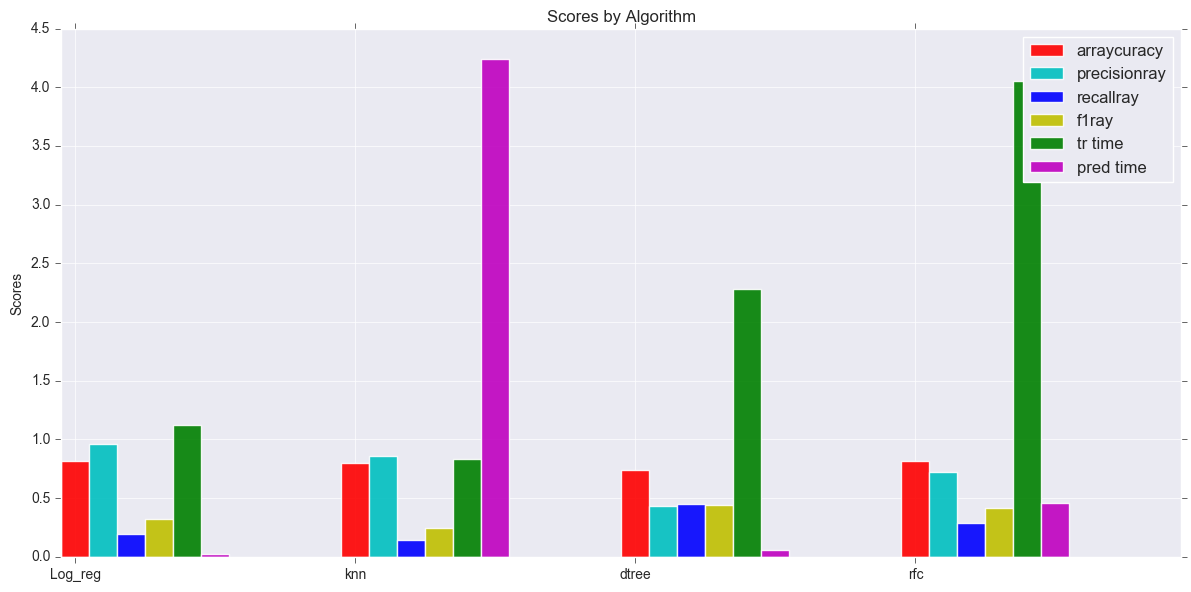

In [85]:
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

n_groups = 4

fig, ax = plt.subplots(figsize=(12,6))

index = np.arange(n_groups)
bar_width = 0.1

opacity = 0.9
error_config = {'ecolor': '0.6'}

ax.bar(index, arraycuracy, bar_width, alpha=opacity, color='r',  error_kw=error_config, label='arraycuracy')
ax.bar(index + 0.1, precisionray, bar_width, alpha=opacity, color='c',  error_kw=error_config,label='precisionray')
ax.bar(index + 0.2, recallray, bar_width, alpha=opacity, color='b',  error_kw=error_config, label='recallray')
ax.bar(index + 0.3, f1ray, bar_width, alpha=opacity, color='y',  error_kw=error_config,label='f1ray')
ax.bar(index + 0.4, train_time, bar_width, alpha=opacity, color='g',  error_kw=error_config,label='tr time')
ax.bar(index + 0.5, predictions_time, bar_width, alpha=opacity, color='m',  error_kw=error_config,label='pred time')

ax.set_ylabel('Scores')
ax.set_title('Scores by Algorithm')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('Log_reg','knn','dtree','rfc'))
ax.legend()

fig.tight_layout()
plt.show()

### Conclusion :
The basic purpose of the study contains credit risk modeling with a machine learning algorithm. Basically, we have tried to establish a solid comparison between different classification algorithm and improve the accuracy of the prediction by increasing accuracy and minimizing errors, bias and varience. As a result, we got Logistic Regression as the best performing model in trems of accuracy, precision and timing and Decission Tree is the worst. However, due to Hardware resource limitation we have failed to test a lot of othres machine learning algorithm with a large amount of data. May be if we incorporate better learning algorithm and better and improved data cleaning and collection and handling missing values properly the result would have been different.

### Reference :
1. Jasson Brownlee: Master Machine Learning Algorithm
2. Peter Harrington: Machine Learning in Action
3. Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani: An Introduction to Statistical Learning
4. Introduction to Statistical Learning: http://www-bcf.usc.edu/~gareth/ISL/
5. LaTeX guides : https://www.sharelatex.com/learn/Aligning_equations_with_amsmath
6. German Credit Data Analysis : https://onlinecourses.science.psu.edu/stat857/node/215
7. Andreas C. Müller, Sarah Guido : Introduction to Machine Learning with Python ,classification and Regression pages 39--57
8. Data Source: https://gallery.azure.ai/Competition/1ad7a6df99794816b9bc071e27d46b10
9. Credit Scoring using Machine Learning Techniques: International Journal of Computer Applications (0975 – 8887) Volume 161 – No 11, March 2017